In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
areacode_country_continent_df = pd.read_csv("plotting_continent/area_country_continent.csv",encoding = "ISO-8859-1")
political_df = pd.read_csv("plotting_continent/political_selected.csv")
nutrition_df = pd.read_csv("plotting_continent/undernourish_selected.csv",encoding = "ISO-8859-1")

In [4]:
nutrition_df['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [5]:
political_df = political_df.merge(areacode_country_continent_df, left_on="Area Code", right_on="Area_Code")
nutrition_df = nutrition_df.merge(areacode_country_continent_df, left_on="Area Code", right_on="Area_Code")

#### Political Index

In [6]:
def plot_timeseries_year(df,target_var,y_label,groupby=False):
    if groupby == False:
        grouped_df = df.groupby(["Year"])[target_var].mean().unstack('Continent')
    else:
        grouped_df = df.groupby([groupby,"Year"])[target_var].mean().unstack('Continent')
    ax = grouped_df.plot(title=f"Time Series of {y_label} by Continent over Time")
    ax.set_ylabel(y_label)
    ax.legend(loc="upper right",bbox_to_anchor=(1.35, 1))

    plt.savefig(f"{target_var}_timeseries.png", bbox_inches="tight",dpi=500)

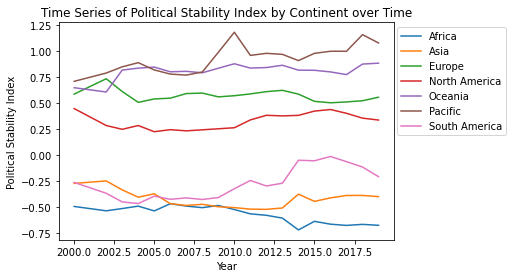

In [123]:
plot_timeseries(political_df,"political","Political Stability Index")

In [7]:
def plot_densities(df,target_var,target_label,lim=False):
    continents = ["Africa","Asia","Europe","North America","Oceania","Pacific","South America"]
    
    for c in continents:
        sns.kdeplot(df[target_var][df.Continent == c], label=c)

    plt.xlabel(target_label)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Distribution of {target_label} between 2000-2020 by Continent")
    if lim != False:
        plt.xlim(lim)
    
    plt.savefig(f"{target_var}_density.png")

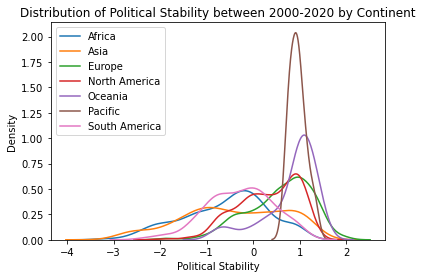

In [130]:
plot_densities(political_df,"political","Political Stability")

#### Malnurishment Index

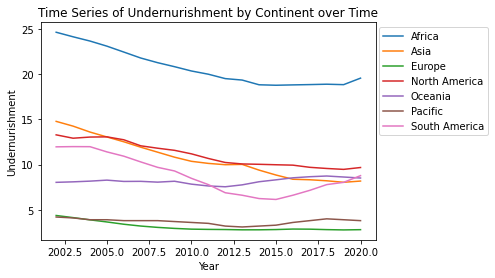

In [8]:
plot_timeseries(nutrition_df,"undernourish","Undernurishment")

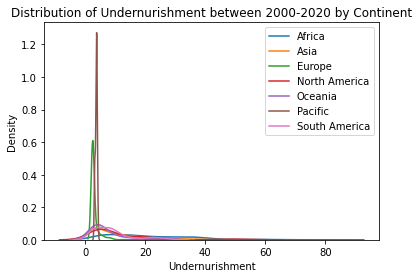

In [9]:
plot_densities(nutrition_df,"undernourish","Undernurishment")

#### Plotting Predictions

In [34]:
full_political = pd.read_csv("plotting_preds/political_true_new.csv")
pred_political = pd.read_csv("plotting_preds/political_preds_new.csv")
full_undernourish = pd.read_csv("plotting_preds/undernourish_true_new.csv")
pred_undernourish = pd.read_csv("plotting_preds/undernourish_preds_new.csv")

In [35]:
nations_lst = ["China","US","France","Iran","Argentina","Ethiopia","Japan","Afghanistan","Mexico","India"]
codes_lst = [41, 231, 68, 102,9, 238, 110, 2, 138, 100]
code_to_nations = {'nations':nations_lst,'codes':codes_lst}

In [36]:
code_to_nations

{'nations': ['China',
  'US',
  'France',
  'Iran',
  'Argentina',
  'Ethiopia',
  'Japan',
  'Afghanistan',
  'Mexico',
  'India'],
 'codes': [41, 231, 68, 102, 9, 238, 110, 2, 138, 100]}

In [37]:
country_code = pd.DataFrame.from_dict(code_to_nations)

In [38]:
full_political = full_political.merge(country_code,left_on='Area Code', right_on='codes')
pred_political = pred_political.merge(country_code,left_on='Area Code', right_on='codes')
full_undernourish = full_undernourish.merge(country_code,left_on='Area Code', right_on='codes')
pred_undernourish = pred_undernourish.merge(country_code,left_on='Area Code', right_on='codes')

In [46]:
def drop_countries(df):
    df = df.drop(df[(df.nations=='Ethiopia')|(df.nations=='Afghanistan')|(df.nations=='Japan')].index)
    return df

In [49]:
pred_political = drop_countries(pred_political)
full_political = drop_countries(full_political)
pred_undernourish = drop_countries(pred_undernourish)
full_undernourish = drop_countries(full_undernourish)

In [50]:
test = pred_political.drop(pred_political[(pred_political.nations=='Japan')|(pred_political.nations=='Afghanistan')].index)
test['nations'].unique()

array(['Argentina', 'France', 'India', 'Iran', 'Mexico', 'US'],
      dtype=object)

In [51]:
pred_political['nations'].unique()

array(['Argentina', 'France', 'India', 'Iran', 'Mexico', 'US'],
      dtype=object)

In [52]:
pred_political['nations'] = pred_political['nations'] + "(Pred)"
full_political['nations'] = full_political['nations'] + "(Real)"

In [53]:
pred_undernourish['nations'] = pred_undernourish['nations'] + "(Pred)"
full_undernourish['nations'] = full_undernourish['nations'] + "(Real)"

In [54]:
def plot_preds(full,pred,pred_var,title_var):
    fig, ax = plt.subplots()
    ax.set_xticks(full.Year.unique())
    ax = pred.groupby(['Year','nations']).mean()['predicted'].unstack().plot(style='--',ax=ax,color=['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan'])
    ax = full.groupby(['Year','nations']).mean()[pred_var].unstack().plot(ax=ax,color=['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan'])
    plt.xticks(rotation=45)
    plt.axvline(x=2017,color='r')
    ax.legend(loc="upper right",bbox_to_anchor=(1.39, 1.03))
    ax.set_ylabel(pred_var)
    plt.title(f"Time Series and Prediction of {title_var} for Select Countries")

In [55]:
full_undernourish.head()

,Unnamed: 0,undernourish,Year,Area Code,nations,codes
19,5,3.0,2002,9,Argentina(Real),9
20,212,3.8,2003,9,Argentina(Real),9
21,419,4.5,2004,9,Argentina(Real),9
22,626,4.0,2005,9,Argentina(Real),9
23,833,3.7,2006,9,Argentina(Real),9


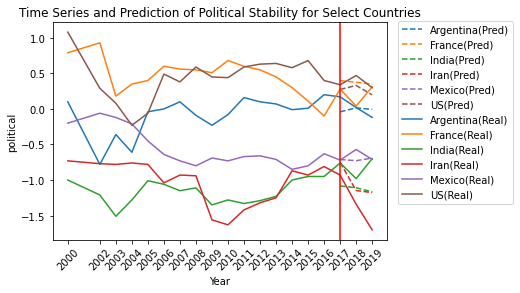

In [56]:
plot_preds(full_political,pred_political,"political","Political Stability")

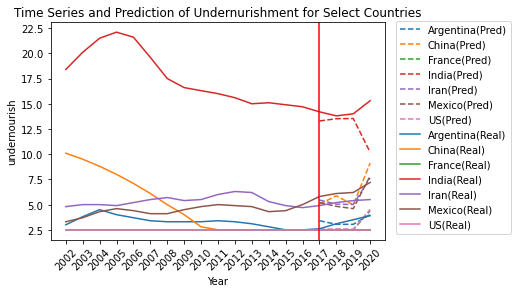

In [57]:
plot_preds(full_undernourish,pred_undernourish,"undernourish","Undernurishment")